In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
u = (np.finfo(float).eps)/2 # Unit roundoff
plt.rcParams['figure.dpi'] = 120 # Plot size

Markdown macros:
$$
\newcommand{\abs}[1]{\left| #1 \right|}
\newcommand{\fun}[2]{#1 \! \left( #2 \right)}
$$

# First-order forward difference

## Implementation

In [3]:
def fwd_diff(x:float, h:float) -> float:
    """
    Approximates the derivative of sin by forward difference.

    Inputs:
        x : The point at which to evaluate the derivative.
        h : The step size for the first-order difference.

    Output:
        dfdx : The first-order forward difference approximation.
    """
    if h <= 0:
        raise ValueError("h must be >=0.")
        
    dfdx = (math.sin(x + h) - math.sin(x))/h
    return dfdx

In [4]:
def fwd_diff_error(x:float, h:float) -> float:
    """
    Computes the absolute error in the forward difference approximation to the derivative of sin.

    Inputs:
        x : The point at which to evaluate the derivative.
        h : The step size for the first-order difference.

    Output:
        error : The error in the forward difference approximation.
    """
    error = abs(fwd_diff(x, h) - math.cos(x))
    return error

In [5]:
hs_fwd = np.logspace(-17,0,171) # Array of step sizes
fwd_diff_errors = np.array([fwd_diff_error((math.pi)/4, h) for h in hs_fwd]) # Array of errors

# Ignore any step size below machine precision
mask = hs_fwd > np.finfo(float).eps
hs_fwd_plot = hs_fwd[mask]
fwd_diff_errors_plot = fwd_diff_errors[mask]

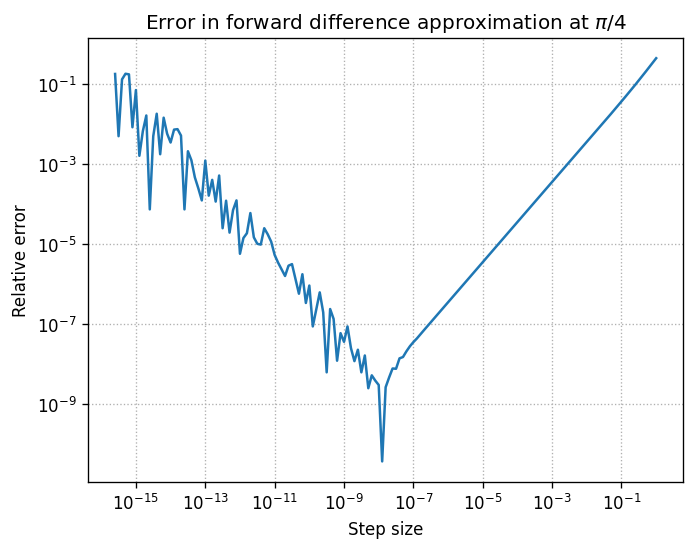

In [6]:
plt.loglog(hs_fwd_plot, fwd_diff_errors_plot)
plt.xlabel("Step size")
plt.ylabel("Relative error")
plt.title(r"Error in forward difference approximation at $\pi/4$")
plt.grid(True, which='both', ls=':')
plt.show()

## Analysis

The relative error falls until a step size of roughly $10^{-8}$, then rises again. The reason for this behavior is that are two distinct sources of error that dominate in different regimes: Truncation and roundoff.

### Truncation error

To understand the truncation error, we can write
\begin{align*}
\fun{f}{x + h}
&=
\fun{f}{x} + \fun{f^{\prime}}{x} \, h + \frac{1}{2} \fun{f^{\prime \prime}}{x} \, h^{2} + \fun{O}{h^{3}}.
\end{align*}
Then the forward approximation is
\begin{align*}
\frac{\fun{f}{x + h} - \fun{f}{x}}{h}
&=
\fun{f^{\prime}}{x} + \frac{1}{2} \fun{f^{\prime \prime}}{x} \, h + \fun{O}{h^{2}}.
\end{align*}
Therefore, the error due to truncation is
\begin{align*}
\varepsilon_{\text{trunc}}
&=
\frac{1}{2} \abs{\fun{f^{\prime \prime}}{x}} h + \fun{O}{h^{2}}.
\end{align*}

### Roundoff error

For the roundoff error, recall that the condition number for summation is
\begin{align*}
\fun{\kappa_{\text{sum}}}{x_1, \ldots, x_n}
&=
\frac{\sum_{i} \abs{x_{i}}}{\abs{\sum_{i} x_{i}}}.
\end{align*}
In other words, if $s = \fun{f}{x + h} - \fun{f}{x}$ and $\hat{s}$ is the floating-point approximation, then
\begin{align*}
\hat{s}
&=
s \left(1 + \delta\right),
\end{align*}
where
\begin{align*}
\abs{\delta}
&\lesssim
\kappa_{\text{sum}} u
\\
&=
\frac{\abs{\fun{f}{x + h}} + \abs{\fun{f}{x}}}{\abs{\fun{f}{x + h} - \fun{f}{x}}} u
\end{align*}
and $u$ is the unit roundoff (half the machine precision). The absolute roundoff error in the forward difference is
\begin{align*}
\abs{\frac{\hat{s}}{h} - \frac{s}{h}}
&=
\frac{\abs{\delta} \abs{s}}{h}
\\
&\lesssim \frac{\kappa_{\text{sum}} u \abs{s}}{h}.
\end{align*}
The $\abs{s}$ in the numerator and the $\abs{s}$ in the denominator of $\kappa_{\text{sum}}$ cancel:
\begin{align*}
\frac{\kappa_{\text{sum}} u \abs{s}}{h}
&=
\frac{\abs{\fun{f}{x+h}} + \abs{\fun{f}{x}}}{\abs{s}} \frac{u \abs{s}}{h}
\\
&=
\left(\abs{\fun{f}{x+h}} + \abs{\fun{f}{x}}\right) \frac{u}{h}
\\
&=
2 \abs{\fun{f}{x}} \frac{u}{h} + \fun{O}{h^{0}}.
\end{align*}
We mainly care about the leading order behavior for small $h$.

### Total error

Altogether, the error is
\begin{align*}
\varepsilon_{\text{total}}
&=
\varepsilon_{\text{trunc}} + \varepsilon_{\text{round}}
\\
&\approx
\frac{1}{2} \abs{\fun{f^{\prime \prime}}{x}} h
+
2 \abs{\fun{f}{x}} \frac{u}{h}.
\end{align*}
Clearly the error grows like $h$ for large $h$ and like $1 / h$ for small $h$.
To find the turning point, we compute
\begin{align*}
\frac{\mathrm{d} \varepsilon_{\text{total}}}{\mathrm{d} h}
&=
\frac{1}{2} \abs{\fun{f^{\prime \prime}}{x}}
-
2 \abs{\fun{f}{x}} \frac{u}{h^2},
\end{align*}
which vanishes when
\begin{align*}
h
&=
2 \sqrt{\frac{\abs{\fun{f}{x}} u}{\abs{\fun{f^{\prime \prime}}{x}}}}.
\end{align*}
In our case, $\fun{f}{x} = \fun{\sin}{\pi / 4}$,
\begin{align*}
\abs{\fun{f}{\frac{\pi}{4}}}
&=
\abs{\fun{f^{\prime}}{\frac{\pi}{4}}}
=
\abs{\fun{f^{\prime \prime}}{\frac{\pi}{4}}}
=
\frac{1}{\sqrt{2}}.
\end{align*}
Therefore the turning point is
\begin{align*}
h^{\ast}
&=
2 \sqrt{u},
\end{align*}
and the relative error at the turning point is
\begin{align*}
\varepsilon_{\text{total}}^{\ast}
&=
\frac{h^{\ast}}{2 \sqrt{2}} + \frac{\sqrt{2} u}{h^{\ast}}
\\
&=
\sqrt{2 u}.
\end{align*}

In [7]:
print(f"The unit roundoff is {u}.")

The unit roundoff is 1.1102230246251565e-16.


In [8]:
h_fwd = 2*(u**(1/2))
eps_fwd = (2*u)**(1/2)
print(f"The theoretical minimum error is roughly {eps_fwd:.3g}, achieved at a step size of roughly {h_fwd:.3g}.")

The theoretical minimum error is roughly 1.49e-08, achieved at a step size of roughly 2.11e-08.


This is where we see the behavior change on the graph. See below for a comparison of the computed and theoretical relative errors.

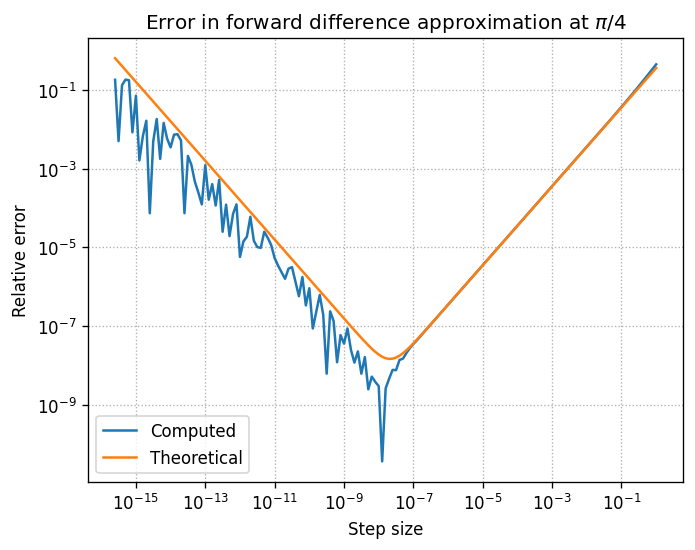

In [9]:
fwd_diff_errors_theory = np.array([(h/(2**(3/2))) + (2**(1/2))*u/h for h in hs_fwd])
fwd_diff_errors_theory_plot = fwd_diff_errors_theory[mask]
plt.loglog(hs_fwd_plot, fwd_diff_errors_plot, label="Computed")
plt.loglog(hs_fwd_plot, fwd_diff_errors_theory_plot, label="Theoretical")
plt.xlabel("Step size")
plt.ylabel("Relative error")
plt.title(r"Error in forward difference approximation at $\pi/4$")
plt.legend()
plt.grid(True, which='both', ls=':')
plt.show()

# Second-order central difference

## Implementation

In [10]:
def central_diff(x:float, h:float) -> float:
    """
    Approximates the derivative of sin by 2nd-order central difference.

    Inputs:
        x : The point at which to evaluate the derivative.
        h : The step size for the second-order difference.

    Output:
        dfdx : The second-order central difference.
    """
    if h <= 0:
        raise ValueError("h must be >=0.")
        
    dfdx = (math.sin(x + h) - math.sin(x - h))/(2*h)
    return dfdx

In [11]:
def central_diff_error(x:float, h:float) -> float:
    """
    Computes the absolute error in the 2nd-order central difference approximation to the derivative of sin.

    Inputs:
        x : The point at which to evaluate the derivative.
        h : The step size for the second-order difference.

    Output:
        error : The error in the second-order central difference approximation.
    """
    error = abs(central_diff(x, h) - math.cos(x))
    return error

In [12]:
hs_central = np.logspace(-17,0,171) # Array of step sizes
central_diff_errors = np.array([central_diff_error((math.pi)/4, h) for h in hs_central]) # Array of errors

# Ignore any step size below machine precision
mask = hs_central > np.finfo(float).eps
hs_central_plot = hs_central[mask]
central_diff_errors_plot = central_diff_errors[mask]

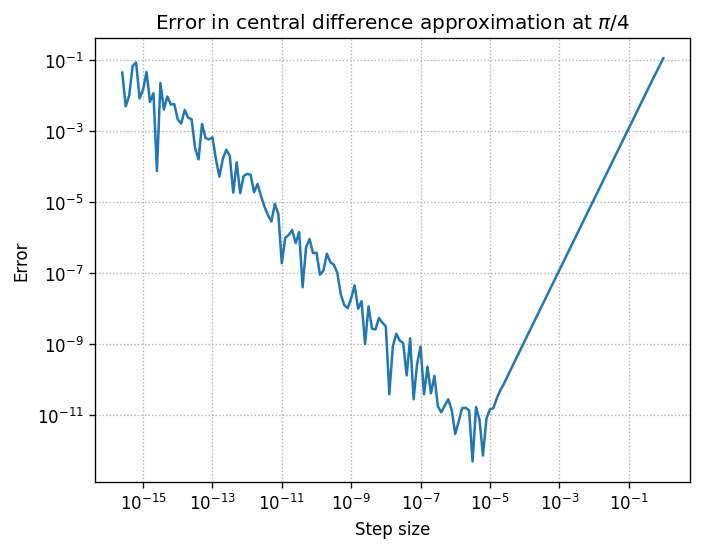

In [13]:
plt.loglog(hs_central_plot, central_diff_errors_plot)
plt.xlabel("Step size")
plt.ylabel("Error")
plt.title(r"Error in central difference approximation at $\pi/4$")
plt.grid(True, which='both', ls=':')
plt.show()

## Analysis

We see similar behavior, but the minimum error is smaller and is achieved at a larger step size.

### Truncation error

\begin{align*}
\fun{f}{x + h}
&=
\fun{f}{x} + \fun{f^{\prime}}{x} \, h + \frac{1}{2} \fun{f^{\prime \prime}}{x} \, h^{2} + \frac{1}{6} \fun{f^{(3)}}{x} \, h^{3} + \fun{O}{h^{4}}
\end{align*}
and
\begin{align*}
\fun{f}{x - h}
&=
\fun{f}{x} - \fun{f^{\prime}}{x} \, h + \frac{1}{2} \fun{f^{\prime \prime}}{x} \, h^{2} - \frac{1}{6} \fun{f^{(3)}}{x} \, h^{3} + \fun{O}{h^{4}}
\end{align*}
so
\begin{align*}
\frac{\fun{f}{x + h} - \fun{f}{x - h}}{2 h}
&=
\fun{f^{\prime}}{x}  + \frac{1}{6} \fun{f^{(3)}}{x} \, h^{2} + \fun{O}{h^{4}}.
\end{align*}
Thus, the truncation error scales like $h^{2}$ instead of $h$:
\begin{align*}
\varepsilon_{\text{trunc}}
&\approx
\frac{1}{6} \abs{\fun{f^{(3)}}{x}} h^{2}.
\end{align*}

### Roundoff error

The condition number is now
\begin{align*}
\kappa
&=
\frac{\abs{\fun{f}{x + h}} + \abs{\fun{f}{x - h}}}{\abs{\fun{f}{x + h} - \fun{f}{x - h}}}
\\
&\approx
\frac{2 \abs{\fun{f}{x}}}{\abs{s}},
\end{align*}
where $s = \fun{f}{x + h} - \fun{f}{x - h}$.
The roundoff error is
\begin{align*}
\varepsilon_{\text{round}}
&\lesssim
\frac{\kappa u \abs{s}}{2 h}
\\
&\approx
\abs{\fun{f}{x}} \frac{u}{h}.
\end{align*}

### Total error

The total error is
\begin{align*}
\varepsilon_{\text{total}}
&\approx
\frac{1}{6} \abs{\fun{f^{(3)}}{x}} h^{2}
+ \abs{\fun{f}{x}} \frac{u}{h}
\\
&=
\frac{h^{2}}{6 \sqrt{2}} + \frac{u}{\sqrt{2} \, h},
\end{align*}
where we evaluated the error at $x = \pi / 4$ in the final line.
The total error is minimized at
\begin{align*}
h^{\ast} &= \left(3 u\right)^{1/3},
\\
\varepsilon_{\text{total}}^{\ast}
&=
\frac{1}{2 \sqrt{2}} \left(3 u\right)^{2/3}.
\end{align*}

In [14]:
h_central = (3*u)**(1/3)
eps_central = (2**(-3/2))*(3*u)**(2/3)
print(f"The minimum error is roughly {eps_central:.3g}, achieved at a step size of rougly {h_central:.3g}.")

The minimum error is roughly 1.7e-11, achieved at a step size of rougly 6.93e-06.


This is where we see the behavior change on the graph. See below for a comparison of the computed and theoretical relative errors.

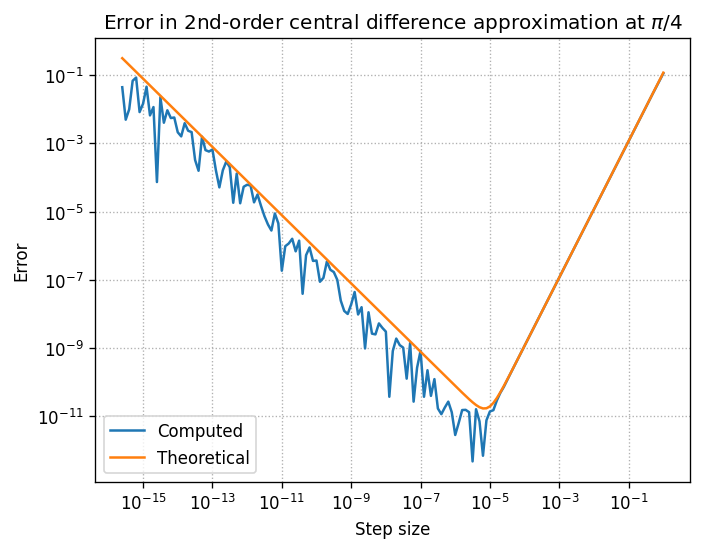

In [15]:
central_diff_errors_theory = np.array([(h**2)/(6*(2**(1/2))) + u/((2**(1/2))*h) for h in hs_central])
central_diff_errors_theory_plot = central_diff_errors_theory[mask]
plt.loglog(hs_central_plot, central_diff_errors_plot, label="Computed")
plt.loglog(hs_central_plot, central_diff_errors_theory_plot, label="Theoretical")
plt.xlabel("Step size")
plt.ylabel("Error")
plt.title(r"Error in 2nd-order central difference approximation at $\pi/4$")
plt.legend()
plt.grid(True, which='both', ls=':')
plt.show()

# Fourth-order central difference

## Implementation

In [16]:
def central_diff_4(x:float, h:float) -> float:
    """
    Approximates the derivative of sin by 4th-order central difference.

    Inputs:
        x : The point at which to evaluate the derivative.
        h : The step size for the second-order difference.

    Output:
        dfdx : The fourth-order central difference approximation.
    """
    if h <= 0:
        raise ValueError("h must be >=0.")
        
    dfdx = (-math.sin(x + 2*h) + 8*math.sin(x + h) - 8*math.sin(x - h) + math.sin(x - 2*h))/(12*h)
    return dfdx

In [17]:
def central_diff_4_error(x:float, h:float) -> float:
    """
    Computes the absolute error in the 4th-order central difference approximation to the derivative of sin.

    Inputs:
        x : The point at which to evaluate the derivative.
        h : The step size for the 4th-order difference.

    Output:
        error : The error in the 4th-order central difference approximation.
    """
    error = abs(central_diff_4(x, h) - math.cos(x))
    return error

In [18]:
hs_central_4 = np.logspace(-17,0,171) # Array of step sizes
central_diff_4_errors = np.array([central_diff_4_error((math.pi)/4, h) for h in hs_central_4]) # Array of errors

# Ignore any step size below machine precision
mask = hs_central_4 > np.finfo(float).eps
hs_central_4_plot = hs_central_4[mask]
central_diff_4_errors_plot = central_diff_4_errors[mask]

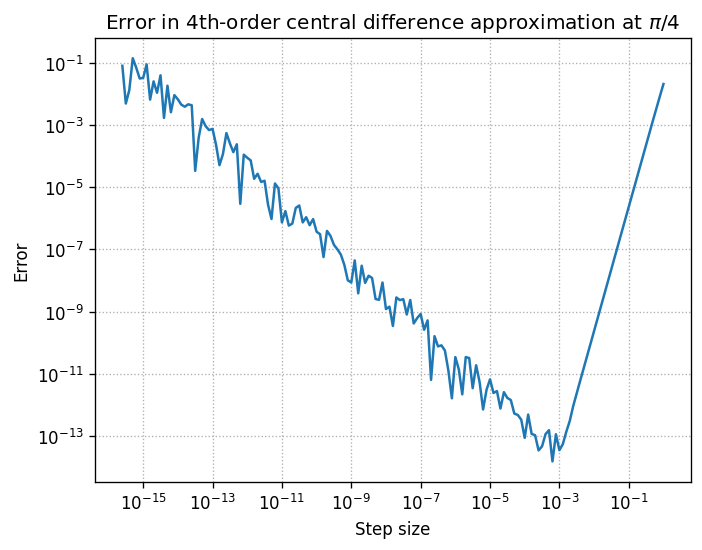

In [19]:
plt.loglog(hs_central_4_plot, central_diff_4_errors_plot)
plt.xlabel("Step size")
plt.ylabel("Error")
plt.title(r"Error in 4th-order central difference approximation at $\pi/4$")
plt.grid(True, which='both', ls=':')
plt.show()

## Analysis

Once again, we see similar behavior, but the minimum error is even smaller and is achieved at an even larger step size.

### Truncation error

Taylor expand:
\begin{align*}
\frac{-\fun{f}{x + 2 h} + 8 \fun{f}{x + h} - 8 \fun{f}{x - h} + \fun{f}{x - 2 h}}{12 h}
&=
\fun{f^{\prime}}{x} - \frac{1}{30} \fun{f^{(5)}}{x} \, h^{4} + \fun{O}{h^{6}}.
\end{align*}
Thus,
\begin{align*}
\varepsilon_{\text{trunc}}
&\approx
\frac{1}{30} \abs{\fun{f^{(5)}}{x}} h^{4}.
\end{align*}

### Roundoff error

The condition number is
\begin{align*}
\kappa
&=
\frac{\abs{\fun{f}{x + 2 h}} + 8 \abs{\fun{f}{x + h}} + 8 \abs{\fun{f}{x - h}} + \abs{\fun{f}{x - 2 h}}}{\abs{s}}
\\
&=
\frac{18 \abs{\fun{f}{x}} + \fun{O}{h}}{\abs{s}},
\end{align*}
where $s = -\fun{f}{x + 2 h} + 8 \fun{f}{x + h} - 8 \fun{f}{x - h} + \fun{f}{x - 2 h}$. The roundoff error is
\begin{align*}
\varepsilon_{\text{round}}
&\lesssim
\frac{\kappa \abs{s} u}{12 h}
\\
&=
\frac{3 \abs{\fun{f}{x}}}{2} \frac{u}{h} + \fun{O}{h^{0}}.
\end{align*}

### Total error

The total error is
\begin{align*}
\varepsilon_{\text{total}}
&\approx
\frac{\abs{\fun{f^{(5)}}{x}}}{30} h^{4} + \frac{3 \abs{\fun{f}{x}} u}{2} \frac{1}{h}
\\
&=
\frac{1}{30 \sqrt{2}} h^{4} + \frac{3 u}{2 \sqrt{2}} \frac{1}{h},
\end{align*}
where we have evaluated the error at $x = \pi / 4$ in the final line. The error is minimized at
\begin{align*}
h^{\ast}
&=
\left(\frac{45 u}{4}\right)^{1/5}
\end{align*}
with minimum error
\begin{align*}
\varepsilon_{\text{total}}^{\ast}
&=
\frac{3^{3/5} \, 5^{4/5} \, u^{4/5}}{8 \, 2^{1/10}}.
\end{align*}

In [20]:
h_central_4 = (45*u/4)**(1/5)
eps_central_4 = ((3**(3/5))*(5**(4/5))*(u**(4/5)))/(8*(2**(1/10)))
print(f"The minimum error is roughly {eps_central_4:.3g}, achieved at a step size of rougly {h_central_4:.3g}.")

The minimum error is roughly 1.41e-13, achieved at a step size of rougly 0.00105.


This is where we see the behavior change on the graph. See below for a comparison of the computed and theoretical relative errors.

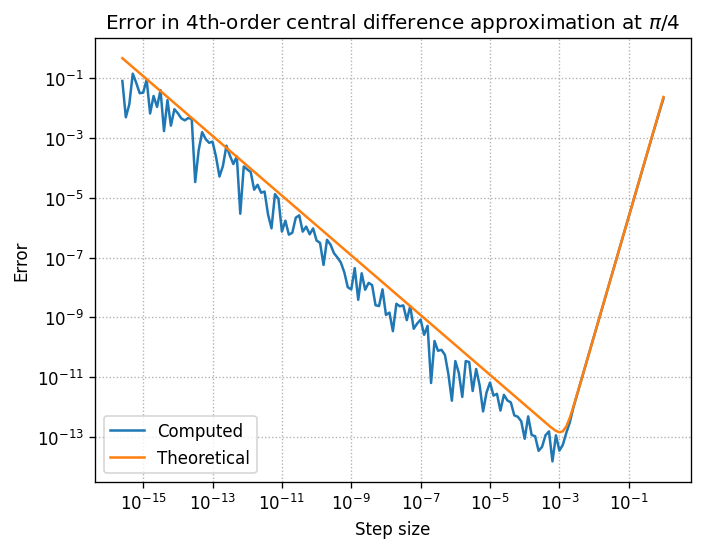

In [21]:
central_diff_4_errors_theory = np.array([(h**4)/(30*(2**(1/2)))+(3*u)/(2*(2**(1/2))*h) for h in hs_central_4])
central_diff_4_errors_theory_plot = central_diff_4_errors_theory[mask]
plt.loglog(hs_central_4_plot, central_diff_4_errors_plot, label="Computed")
plt.loglog(hs_central_4_plot, central_diff_4_errors_theory_plot, label="Theoretical")
plt.xlabel("Step size")
plt.ylabel("Error")
plt.title(r"Error in 4th-order central difference approximation at $\pi/4$")
plt.legend()
plt.grid(True, which='both', ls=':')
plt.show()